In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df.shape

(100, 4)

In [8]:
new_df = df.iloc[:,1:]
new_df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


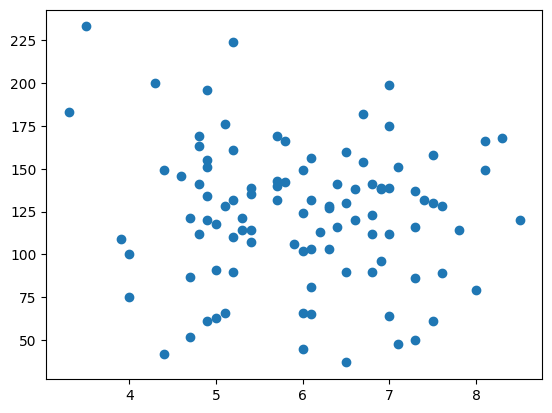

In [9]:
plt.scatter(new_df.cgpa, new_df.iq)

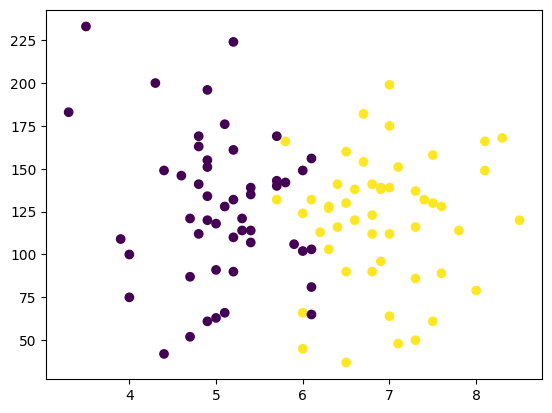

In [10]:
plt.scatter(new_df.cgpa, new_df.iq ,c=new_df.placement)
# purple color denotes the person is not placed

In [11]:
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
y.shape

(100,)

In [14]:
x.shape

(100, 2)

Now we will split the testing rows and columns choose any one of them using sickitlearn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# donot change order of any variable !important
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.1)

test_size = 0.1 means select any 10 values for testing if i have 100 values to pass

In [17]:
x_test

,cgpa,iq
3,7.4,132.0
89,4.9,151.0
83,7.5,130.0
69,8.5,120.0
54,6.4,141.0
60,6.9,139.0
14,6.1,103.0
58,8.0,79.0
0,6.8,123.0
64,7.0,64.0


In [18]:
print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

(10, 2) (90, 2) (10,) (90,)


feature scaling is done as we can see the data is not properly distributed

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scalar = StandardScaler()

In [21]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

The fit_transform method calculates the mean and standard deviation of the training data:
Mean: [3, 4]
Standard Deviation: [1.63299316, 1.63299316]

example lets suppose we have a data set like this
[[1 2]
[3 4]
 [5 6]]
 https://chatgpt.com/share/75b6db32-7212-4555-ab15-188215c67c24

In [22]:
x_train_scaled

array([[-0.6191083 , -0.83565843],
       [ 0.73770372,  1.41377324],
       [ 1.00906612,  1.82942909],
       [-0.8904707 ,  0.75361394],
       [-0.43820003,  0.26460706],
       [ 1.55179093, -0.86010878],
       [-0.07638349,  0.43575947],
       [-1.43319551,  1.85387943],
       [-0.8904707 ,  1.75607806],
       [-0.70956243,  0.09345465],
       [ 0.55679545, -2.13152667],
       [ 1.7326992 , -0.24885017],
       [ 0.46634131, -0.19994948],
       [-0.6191083 ,  0.19125603],
       [-0.16683763,  1.09591876],
       [ 1.28042852, -1.8136722 ],
       [-0.8904707 , -1.54471841],
       [ 0.82815785, -0.29775086],
       [ 0.55679545,  0.14235534],
       [ 1.28042852,  0.31350775],
       [-0.98092483, -0.29775086],
       [ 1.09952025, -1.86257289],
       [-0.80001657, -0.15104879],
       [-1.79501204, -0.37110189],
       [-1.70455791, -1.20241359],
       [ 0.64724958, -0.1021481 ],
       [-1.07137897, -0.90900946],
       [-0.98092483,  0.41130912],
       [-0.8904707 ,

In [23]:
x_train_scaled.shape

(90, 2)

In [24]:
x_test_scaled

array([[ 1.37088266,  0.19125603],
       [-0.8904707 ,  0.65581257],
       [ 1.46133679,  0.14235534],
       [ 2.36587814, -0.1021481 ],
       [ 0.46634131,  0.41130912],
       [ 0.91861199,  0.36240844],
       [ 0.19497891, -0.51780396],
       [ 1.91360746, -1.10461222],
       [ 0.82815785, -0.02879707],
       [ 1.00906612, -1.47136738]])

In [25]:
x_test_scaled.shape

(10, 2)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
# model training
clf.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(x_test_scaled)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
y_test

3     1
89    0
83    1
69    1
54    1
60    1
14    0
58    1
0     1
64    1
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.9

In [34]:
from mlxtend.plotting import plot_decision_regions

In [35]:
y_train.values

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0])

we have to convert our y train to array before passing it to plot_decision_regions

<Axes: >

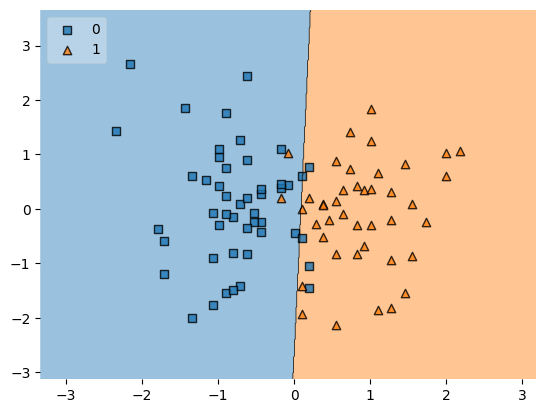

In [36]:
plot_decision_regions(x_train_scaled, y_train.values, clf=clf, legend=2)